# Import

In [140]:
import numpy as np

# Define

In [184]:
def Normalizer(sample, std_threshold=10**-6):
    sample_mean = sample.mean()
    sample_std = sample.std()
    if sample_std <=std_threshold:
        sample_std = std_threshold
        print("WARNING : sample standard deviation smaller than threshold, set to threshold : ", std_threshold)
    
    return sample_mean, sample_std, (sample-sample_mean)/sample_std

def Skew(sample, decimals=6):
    return np.round((Normalizer(sample)[2]**3).mean(), decimals)

def Kurtosis(sample, decimals=6):
    return np.round((Normalizer(sample)[2]**4).mean(), decimals)

def SkewlessNormalizer(sample, iterate = 1000, skew_threshold=10**-3):
    reverse = 1
    if np.abs(Skew(sample)) < skew_threshold:
        return sample
    elif Skew(sample) < 0:
        reverse = -1
    
    sample_min = (reverse*sample).min() # to non-negative
    bias = 1.
    move = 1.
    sign = 1
    for i in range(iterate):
        pre_sign = sign
        trans_skew = Skew(np.log(reverse*sample - sample_min + bias))
        if np.abs(trans_skew)<skew_threshold:
            break
        elif trans_skew > 0:
            sign = -1
        else:
            sign = 1
        
        if sign*pre_sign < 1:
            move *= 0.5
        
        if bias + sign*move > 0:
            bias += sign*move
        else:
            bias = bias/2
    
    skewless_sample = np.log(reverse*sample - sample_min + bias)
    
    skewless_sample *= reverse    
    return Normalizer(skewless_sample)[2]

def RandomBinarySkew(mean, std, skewness, size):
    abs_skewness = np.abs(skewness)
    value = (abs_skewness + np.sqrt(abs_skewness**2+4))/2
    prob = 1/((value**2)+1)
    random_seed = np.random.random(size)
    output = value*(random_seed < prob) - (1/value)*(random_seed >= prob)
    if skewness < 0:
        output *= -1
    
    output = std*output + mean
    return output

def RandomBernoulliSkew(mean, std, skewness, order, size):
    order = max(1, order)
    order_sqrt=np.sqrt(order)
    output = RandomBinarySkew(0, 1, skewness*order_sqrt, size)
    for t in range(1, order):
        output += RandomBinarySkew(0, 1, skewness*order_sqrt, size)
    
    output /= order_sqrt
    output = std*output + mean
    return output

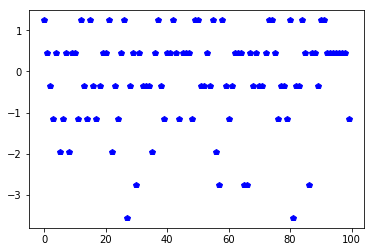

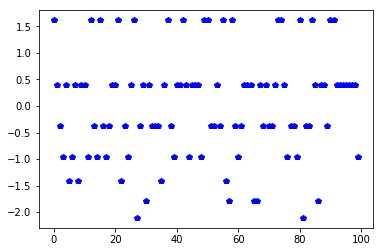

In [186]:
dis = RandomBernoulliSkew(0, 1, -0.8, 1000, 100)
fooo = SkewlessNormalizer(dis)
plt.plot(np.arange(100), dis, "bp")
plt.show()
plt.plot(np.arange(100), fooo, "bp")
plt.show()

In [143]:
dis = RandomBernoulliSkew(1, 1, -0.2, 100, 10000)

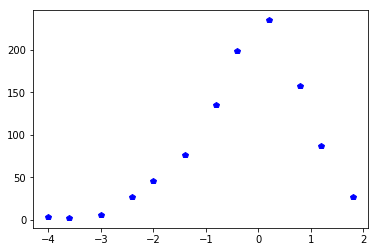

In [179]:
dis = RandomBernoulliSkew(0, 1, -0.5, 100, 1000)
counter = np.zeros(100)
for i in range(100):
    counter[i] = ((dis>((i-50)/5))*(dis<((i-49)/5))).sum()

import matplotlib.pyplot as plt
index = (counter>0)
plt.plot(((np.arange(100)-50)/5)[index], counter[index], "bp")
plt.show()

In [144]:
Skew(dis)

-0.194985